In [2]:
!pip install numpy tensorflow keras 
!pip install tensorflow-gpu
import numpy as np
import tensorflow as tf
from tensorflow import keras


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\luthr\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\luthr\\AppData\\Local\\Temp\\pip-install-an2pvdbe\\tensorflow-gpu_bbea8cef842c42659af1965e65cc1181\\setup.py'"'"'; __file__='"'"'C:\\Users\\luthr\\AppData\\Local\\Temp\\pip-install-an2pvdbe\\tensorflow-gpu_bbea8cef842c42659af1965e65cc1181\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\luthr\AppData\Local\Temp\pip-wheel-hjgih3_q'
       cwd: C:\Users\luthr\AppData\Local\Temp\pip-install-an2pvdbe\tensorflow-gpu_bbea8cef842c42659af1965e65cc1181\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us

  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


Accuracy: 0.8


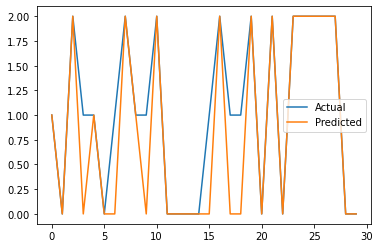

In [3]:
# Write a program to implement a perceptron model using sklearn library.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a perceptron classifier
perceptron = Perceptron()

# Train the perceptron model
perceptron.fit(X_train, y_train)

# Make predictions on the test set
predictions = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


Accuracy: 0.95


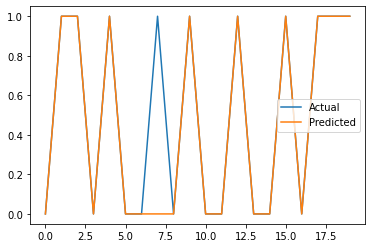

In [4]:
# Write a program to implement a perceptron model from scratch.
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training the perceptron
        for _ in range(self.n_iterations):
            for i in range(n_samples):
                # Compute the prediction for sample i
                prediction = self.predict_single_sample(X[i])

                # Update weights and bias based on the prediction error
                update = self.learning_rate * (y[i] - prediction)
                self.weights += update * X[i]
                self.bias += update

    def predict_single_sample(self, x):
        # Compute the weighted sum
        linear_output = np.dot(x, self.weights) + self.bias
        # Apply step function
        return 1 if linear_output >= 0 else 0

    def predict(self, X):
        # Make predictions for multiple samples
        return np.array([self.predict_single_sample(x) for x in X])

# Define a function to generate synthetic data for binary classification
def generate_data():
    np.random.seed(42)
    # Generate random data for binary classification
    X = np.random.rand(100, 2)  # 100 samples, 2 features
    y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Classify based on the sum of the features
    return X, y

# Generate synthetic data
X, y = generate_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Perceptron instance
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)

# Train the perceptron model
history = perceptron.fit(X_train, y_train)

# Make predictions on the test set
predictions = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [8]:
# Write a program to implement the FeedForward pass for MultiLayer neural network.
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases for the hidden layer and output layer
        self.weights_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.random.randn(1, self.hidden_size)
        self.weights_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.random.randn(1, self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def feedforward(self, X):
        # Calculate output of the hidden layer
        hidden_input = np.dot(X, self.weights_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        
        # Calculate output of the output layer
        output_input = np.dot(hidden_output, self.weights_output) + self.bias_output
        output = self.sigmoid(output_input)
        
        return output

input_size = 2
hidden_size = 3
output_size = 1

# Create a neural network with 2 input neurons, 3 hidden neurons, and 1 output neuron
model = NeuralNetwork(input_size, hidden_size, output_size)

# Sample input
X = np.array([[0.1, 0.2]])

# Perform feedforward pass
output = model.feedforward(X)
print("Output:", output)

Output: [[0.85397153]]


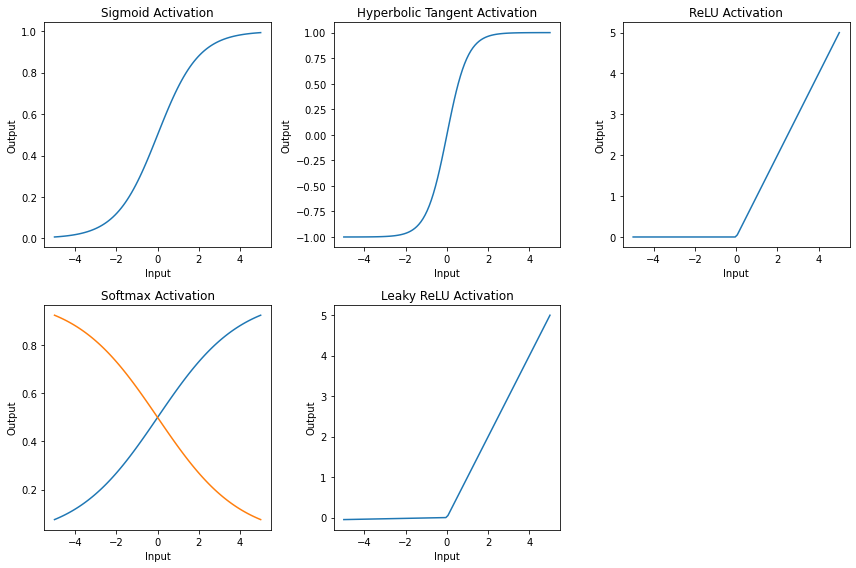

In [9]:
# Write a program to study and plot the various activation functions:
# a. Sigmoid
# b. Hyperbolic Tanh
# c. ReLu
# d. Softmax
# e. LeakyReLu

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0))  # Subtracting max to improve numerical stability
    return exp_x / np.sum(exp_x, axis=0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate input values
x = np.linspace(-5, 5, 100)

# Compute activation values
sigmoid_y = sigmoid(x)
tanh_y = tanh(x)
relu_y = relu(x)
softmax_y = softmax(np.array([x, x / 2]))  # Softmax applied on 2-dimensional input
leaky_relu_y = leaky_relu(x)

# Plot activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid_y, label='Sigmoid')
plt.title('Sigmoid Activation')
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 3, 2)
plt.plot(x, tanh_y, label='Tanh')
plt.title('Hyperbolic Tangent Activation')
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 3, 3)
plt.plot(x, relu_y, label='ReLU')
plt.title('ReLU Activation')
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 3, 4)
plt.plot(x, softmax_y[0], label='Softmax_1')
plt.plot(x, softmax_y[1], label='Softmax_2')
plt.title('Softmax Activation')
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 3, 5)
plt.plot(x, leaky_relu_y, label='Leaky ReLU')
plt.title('Leaky ReLU Activation')
plt.xlabel('Input')
plt.ylabel('Output')

plt.tight_layout()
plt.show()





313/313 [==============================] - 2s 3ms/step - loss: 0.0781 - accuracy: 0.9776
Test accuracy: 0.9775999784469604


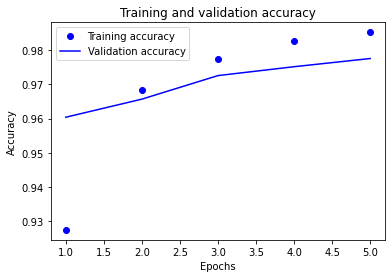

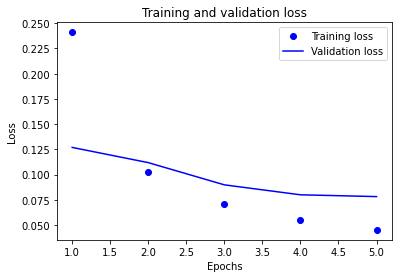

In [10]:
# Write a program to implement multi-layer perceptrons using TensorFlow. Apply multi-layer perceptron (MLP) on the MNIST dataset.
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the MLP model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 1D vector
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test),verbose = 0)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Analyze the results and plot the training and validation curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

17464789/17464789 [==============================] - 3s 0us/step


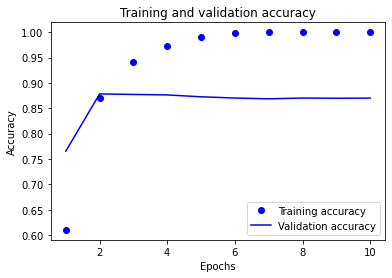

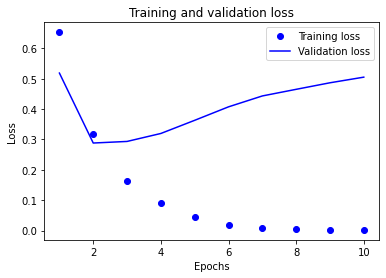

In [11]:
# Write a program to implement the following:
# •	Load the IMDB dataset,
# •	Prepare the dataset,
# •	Build a binary classification model to implement movies reviews classification using ‘relu’ activation function.
# •	Analyse the results and plot the training and validation curves.
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=10000)

# Prepare the dataset
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

# Define the binary classification model
model = models.Sequential([
    layers.Embedding(10000, 16, input_length=500),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test),verbose=0)

# Analyze the results and plot the training and validation curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
# Write a program to implement stochastic and batch gradient descent in python.
import numpy as np

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100, batch_size=1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    for _ in range(epochs):
        for _ in range(n_samples):
            random_index = np.random.randint(n_samples)
            X_batch = X[random_index:random_index+batch_size]
            y_batch = y[random_index:random_index+batch_size]
            gradient = np.dot(X_batch.T, (np.dot(X_batch, weights) - y_batch)) / batch_size
            weights -= learning_rate * gradient
    return weights

def batch_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    for _ in range(epochs):
        gradient = np.dot(X.T, (np.dot(X, weights) - y)) / n_samples
        weights -= learning_rate * gradient
    return weights

# Example usage:
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 7, 11])

# Stochastic Gradient Descent
weights_sgd = stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000, batch_size=1)
print("Weights (SGD):", weights_sgd)

# Batch Gradient Descent
weights_bgd = batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000)
print("Weights (Batch GD):", weights_bgd)

Weights (SGD): [0.99242155 1.00623975]
Weights (Batch GD): [0.9463076  1.04238709]


In [13]:
# Write a program to implement the following:
# •	Load Fashion MNIST dataset using TensorFlow and Keras library.
# •	Preprocess images to lie in range 0 to 255
# •	Split the data into train-test-validation sets.
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess images to lie in range 0 to 255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the data into train-test-validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Train data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)
print("Train labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train data shape: (48000, 28, 28)
Validation data shape: (12000, 28, 28)
Test data shape: (10000, 28, 28)
Train labels shape: (48000,)
Validation labels shape: (12000,)
Test labels shape: (10000,)



Test loss: 0.026232192292809486
Test accuracy: 0.9908999800682068


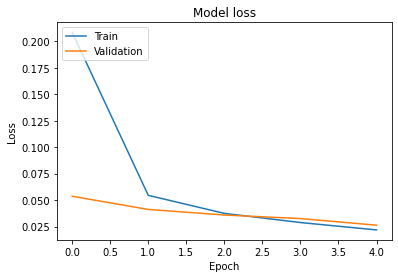

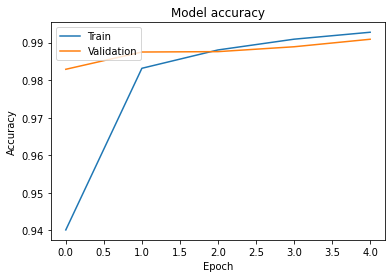

In [14]:
# Write a program to implement Convnets on MNIST dataset using keras sequenctial model.
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt 

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test),verbose=0)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

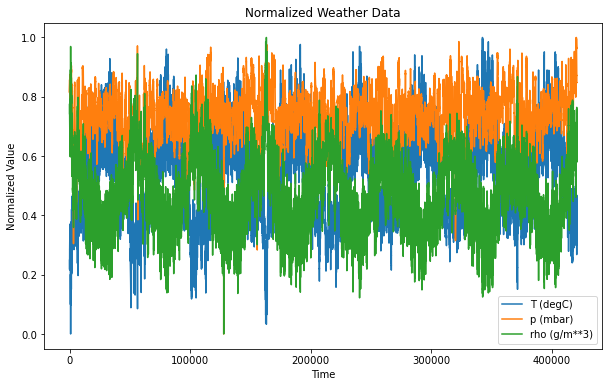

Epoch 1/10
2103/2103 [==============================] - 16s 7ms/step - loss: 6.2263e-04 - val_loss: 3.9147e-05
Epoch 2/10
2103/2103 [==============================] - 15s 7ms/step - loss: 4.0690e-05 - val_loss: 3.7306e-05
Epoch 3/10
2103/2103 [==============================] - 15s 7ms/step - loss: 3.7164e-05 - val_loss: 2.9974e-05
Epoch 4/10
2103/2103 [==============================] - 15s 7ms/step - loss: 3.1801e-05 - val_loss: 3.3611e-05
Epoch 5/10
2103/2103 [==============================] - 14s 7ms/step - loss: 2.8248e-05 - val_loss: 2.0083e-05
Epoch 6/10
2103/2103 [==============================] - 15s 7ms/step - loss: 2.6067e-05 - val_loss: 2.3605e-05
Epoch 7/10
2103/2103 [==============================] - 15s 7ms/step - loss: 2.5828e-05 - val_loss: 3.9065e-05
Epoch 8/10
2103/2103 [==============================] - 15s 7ms/step - loss: 2.4716e-05 - val_loss: 2.1664e-05
Epoch 9/10
2103/2103 [==============================] - 16s 7ms/step - loss: 2.3975e-05 - val_loss: 1.9284e-05
E

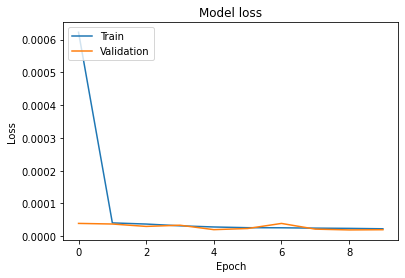

In [17]:
# Write a program to perform the following on the Jena weather dataset:
# •	Parse the data, 
# •	Normalize the data
# •	Visualize the data
# •	Implement the 1D CNN model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("jena_climate_2009_2016.csv")

# Parse the data
# For this example, let's assume we're interested in only a subset of features, and we'll predict temperature
features = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
data = data[features]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Visualize the data
plt.figure(figsize=(10, 6))
for i in range(data_scaled.shape[1]):
    plt.plot(data_scaled[:, i], label=features[i])
plt.legend()
plt.title("Normalized Weather Data")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.show()

# Prepare data for 1D CNN
# Assume we are using past 24 hours to predict the temperature in the next hour
look_back = 24
X, y = [], []
for i in range(len(data_scaled) - look_back):
    X.append(data_scaled[i:(i + look_back)])
    y.append(data_scaled[i + look_back, 0])  # Predicting temperature
X, y = np.array(X), np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build 1D CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, len(features))),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/5
2629/2629 [==============================] - 19s 6ms/step - loss: 0.0040 - val_loss: 8.9936e-04
Epoch 2/5
2629/2629 [==============================] - 18s 7ms/step - loss: 9.0699e-04 - val_loss: 0.0013
Epoch 3/5
2629/2629 [==============================] - 17s 6ms/step - loss: 8.3838e-04 - val_loss: 8.7718e-04
Epoch 4/5
2629/2629 [==============================] - 17s 6ms/step - loss: 8.0048e-04 - val_loss: 7.5901e-04
Epoch 5/5
2629/2629 [==============================] - 20s 8ms/step - loss: 7.8330e-04 - val_loss: 8.4454e-04


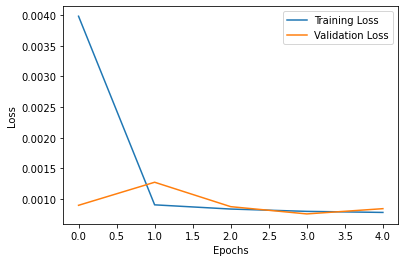

2629/2629 [==============================] - 10s 4ms/step - loss: 8.4454e-04
Test Loss: 0.0008445361163467169


In [18]:
# Write a program to implement time-series forecasting using 1 D CNN on the weather time series dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

data = pd.read_csv('jena_climate_2009_2016.csv')

# Extract the target variable and scale it
target_variable = 'T (degC)'
scaler = StandardScaler()
data[target_variable] = scaler.fit_transform(data[[target_variable]])

# Define parameters
window_size = 10  # Window size for creating input sequences
forecast_horizon = 1  # Forecast horizon

# Create input sequences and corresponding target values
def create_sequences(data, window_size, forecast_horizon):
    sequences = []
    targets = []
    for i in range(len(data) - window_size - forecast_horizon + 1):
        sequences.append(data[i:i+window_size])
        targets.append(data[i+window_size:i+window_size+forecast_horizon])
    return np.array(sequences), np.array(targets)

# Create sequences and targets
sequences, targets = create_sequences(data[target_variable], window_size, forecast_horizon)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Build the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(forecast_horizon)  # Output layer with the forecast horizon as the number of units
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Reshape input data to fit the CNN input shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


In [19]:
# Write a program to implement VGGNet-16 Convolutional Neural Network (CNN) Architecture.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
def vgg16():
    model = Sequential(name="VGG-16")
    
    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Dense layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='softmax'))  # Change 1000 to your desired output classes
    
    return model
# Test the model
vgg_model = vgg16()
vgg_model.summary()

Model: "VGG-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                       

In [22]:
# Write a program to fine-tune the VGGNet-16 Convolutional Neural Network (CNN) Architecture.
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist

# Load MNIST dataset (modify for train/test split)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data (normalize and reshape for VGG16 input)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Expand grayscale dimension to match VGG16 input (Option 1)
train_images = np.expand_dims(train_images, axis=-1)  # Add a channel dimension at the end
test_images = np.expand_dims(test_images, axis=-1)

# Reshape remaining dimensions
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define data augmentation for training data
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)

# Load pre-trained VGG16 model (exclude final layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(28, 28, 1))

# Freeze pre-trained layers (optional, adjust as needed)
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with data augmentation
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Save the fine-tuned model (optional)
model.save('fine_tuned_vgg16_mnist.h5')


ValueError: The input must have 3 channels; Received `input_shape=(28, 28, 1)`

epochs: 100 ========> acc: 96.60153702676266


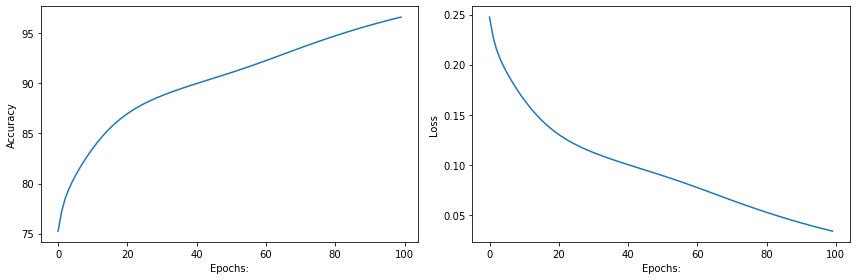

In [23]:
# Write a program to perform Numpy implementation of the simple Recurrent Neural Networks.
import matplotlib.pyplot as plt1
# Creating data set

a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]

# Labels are also converted into NumPy array
y = np.array(y)

# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)
# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1-a1)))

	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	print("epochs:", j + 1, "========> acc:", (1-(sum(l)/len(x)))*100) 
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 

w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)
plt.figure(figsize=(12, 4))
# plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
# plotting Loss
plt.subplot(1, 2, 2)
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.tight_layout()  # Ensures subplots do not overlap
plt.show()

Model: "SimpleRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 1s 612ms/step
predictions : [[5.6180573]]


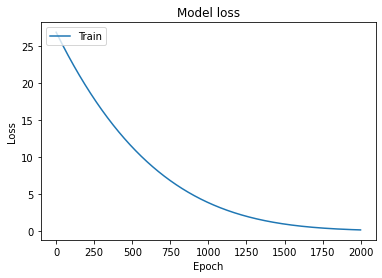

In [24]:
# Write a program to implement simple Recurrent Neural Networks using Keras.
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Define your sequence data
X = np.array([[[1], [2], [3], [4], [5]]])  # Input sequence
y = np.array([[6]])  # Output sequence

# Define the model
model = Sequential(name="SimpleRNN")

# Add a SimpleRNN layer with 3 units
model.add(SimpleRNN(units=3, input_shape=(None, 1)))

# Add a Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# Train the model
history = model.fit(X, y, epochs=2000, verbose=0)

# Test the model
X_test = np.array([[[6], [7], [8], [9], [10]]])
predictions = model.predict(X_test)
print(f"predictions : {predictions}")  # Output: Predicted value for the next sequence element

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7/7 [==============================] - 1s 6ms/step - loss: 7.0195e-04
Test Loss: 0.0007019492331892252
7/7 [==============================] - 1s 5ms/step


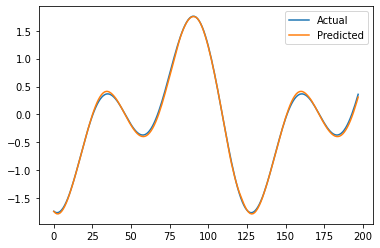

In [25]:
# Write a program to implement time-series forecasting using the LSTM model on the custom dataset.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def generate_time_series(n_points):
    time = np.arange(0, n_points)
    amplitude = np.sin(time * 0.1) + np.cos(time * 0.05)
    return amplitude

# Prepare data for LSTM model
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_idx = i + n_steps
        if end_idx > len(series) - 1:
            break
        seq_x, seq_y = series[i:end_idx], series[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define LSTM model
def create_lstm_model(n_steps, n_features):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps, n_features)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

n_points = 1000
series = generate_time_series(n_points)
n_steps = 10  # Number of time steps to consider for each prediction
n_features = 1  # Number of features (univariate time series)

X, y = prepare_data(series, n_steps)
X = X.reshape((X.shape[0], X.shape[1], n_features))

split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Create and train LSTM model
model = create_lstm_model(n_steps, n_features)
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Evaluate model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Plot results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()